# Exercise 2 - Slot Machine

## Imports

In [31]:
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [32]:
# Spins the slot machine, returning a three tuple of symbols
def spin_slot_machine():
    combination = []
    symbols = ["BAR", "BELL", "LEMON", "CHERRY"]
    for _ in range(3):
        combination.append(random.choice(symbols))
    return tuple(combination)

In [33]:
# Pattern matches the combination, returning the appropriate payout
def check_payout(result):
    match result:
        case ("BAR", "BAR", "BAR"):
            return 20
        case ("BELL", "BELL", "BELL"):
            return 15
        case ("LEMON", "LEMON", "LEMON"):
            return 5
        case ("CHERRY", "CHERRY", "CHERRY"):
            return 3
        case ("CHERRY", "CHERRY", _):
            return 2
        case ("CHERRY", _, _): 
            return 1
    return 0

In [34]:
# Runs a test with balance of 10, checking how many rounds it can go before tapping out
# Returns a tuple of containing (1) number of rounds until broke and (2) the win/loss ratio
def play(balance):
    num_rounds = won_rounds = 0

    while balance > 0:
        num_rounds = num_rounds + 1
        combination = spin_slot_machine()
        payout = check_payout(combination)
        payout_bool = payout > 0 
        balance = balance + payout - 1

        if payout_bool:
            won_rounds = won_rounds + 1

    win_ratio = won_rounds/num_rounds
    return (num_rounds, win_ratio)

## Simulation

In [35]:
N_TESTS = 10000
BALANCE = 10

In [36]:
num_rounds_data = []
win_ratio_data = []

for _ in range(N_TESTS):
    temp = play(BALANCE)
    num_rounds_data.append(temp[0])
    win_ratio_data.append(temp[1])

## Data visualization

Results after 10000 tests:
Median number of rounds played before going broke: 21.0
Mean number of rounds played before going broke: 213.8
Mean win_ratio: 0.255


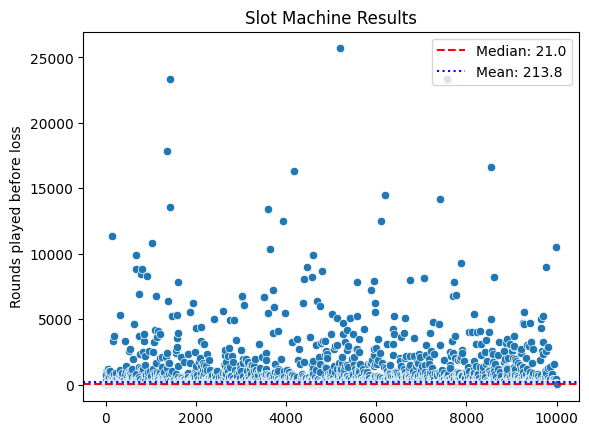

In [37]:
plt.title("Slot Machine Results")
plt.ylabel("Rounds played before loss")

y = num_rounds_data
y_median = round(statistics.median(y), 1)
y_mean = round(statistics.mean(y), 1)

plt.axhline(y_median, c='red', linestyle="--", label="Median: " + str(y_median))
plt.axhline(y_mean, c='blue', linestyle=":", label="Mean: " + str(y_mean))
sns.scatterplot(y)

print("Results after " + str(N_TESTS) + " tests:")
print("Median number of rounds played before going broke: " + str(y_median))
print("Mean number of rounds played before going broke: " + str(y_mean))
print("Mean win_ratio: " + str(round(statistics.mean(win_ratio_data), 3)))